In [4]:
!pip install bs4
!pip install requests
!pip install pandas
!pip install matplotlib

You should consider upgrading via the '/Users/lucbertin/.pyenv/versions/3.8.8/envs/base_env/bin/python3.8 -m pip install --upgrade pip' command.


In [98]:
from requests import get
response = get("https://www.afm-telethon.fr/telethon/bref/parrains-resultats-telethon-1379")
response.status_code

200

In [99]:
html = response.content

from bs4 import BeautifulSoup
soup = BeautifulSoup(html, "html.parser")

- **p** : tous les p
- **p.colorized**: tous les p de classe "colorized"
- **p#1**: tous les p d'id1
- **p a**: tous les a dans les p
- **table#2 tr.colorized** :tous les tr qui ont pour classe colorized dans les table d'id 2

In [100]:
annees = [ el.get_text() for el in soup.select("table tr td")[3::3] ]
parrains = [ el.get_text() for el in soup.select("table tr td")[4::3] ]
montants = [ el.get_text() for el in soup.select("table tr td")[5::3] ]

In [101]:
import pandas as pd

df = pd.DataFrame({
        "annees"  : annees,
        "parrains": parrains,
        "montants": montants,
    }
)

In [102]:
df.annees = df.annees.astype(int)
df.montants = df.montants.str.replace('€', '').str.replace(' ', '').astype(int)

In [103]:
df.dtypes

annees       int64
parrains    object
montants     int64
dtype: object

<AxesSubplot:xlabel='annees'>

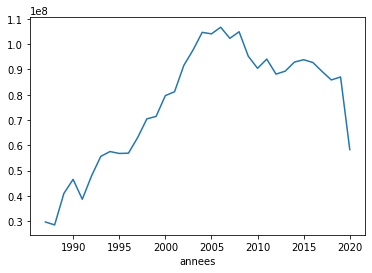

In [104]:
df.set_index("annees").montants.plot(kind="line")